# Clustering Demonstration --  KMeans, Agglomerative(Hierarchical): a) Two-Dimensional Dataset,  b) Multi-Dimenional Dataset- PCA(2 Components), c) Multi-Dimenional Dataset- PCA(4 Components)

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*In this notebook, the use of the **KMeans** and the **Agglomerative (Hierarchical)** algorithm for feature samples clustering (wholesale customers dataset) is demonstrated. In the first part **(Part A)** of this project clustering is based on a two dimensional dataset, whereas in the second **(Part B)** and third **(Part C)** part, the dataset is multidimensional (six features). In parts two and three, there is use of **Principal Component Analysis (PCA)** for dimensionality reduction with use of two and four principal components respectively.*

*KMeans model is an unsupervised learning algorithm that assigns a cluster for each dataset sample by taking into account its distance from the cluster centroids (assigned to the cluster with the smallest distance between the sample and the cluster centroid). There is use of **a)** the 'Elbow' method and **b)** the 'Silhouette' score for determining the optimal number of clusters. With respect to the Agglomerative model,each feature sample forms it own cluster (at the start) and then these clusters are merged recursively (samples similarity-i.e Euclidean Distance). The optimal number of clusters is selected based on the 'dissimilarity threshold' technique that requires the creation of a dendrogram (scipy.cluster.hierarchy) that is a type of tree diagram. In terms of the dataset, the rows indicate the amount of money(monetary units) spent by each customer on a yearly basis for buying six different products.*



**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*Wholesale customers Data Set*" -- File: "Wholesale customers data.csv" -- Source:https://www.kaggle.com/binovi/wholesale-customers-data-set



# PART A                          
## Two-Dimensional Dataset

## a) KMeans Clustering

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
data=pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Number of Entries:440 - Data Type:int64 -Non-Null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
# Column Renaming
data=data.rename(columns={'Delicassen':'Delicatessen'})
data.columns.unique()

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [5]:
# Selecting the two features that are to be used for determining the clusters in this 2-D Case Study
df_2dim=data[['Frozen','Grocery']]
df_2dim.head()

,Frozen,Grocery
0,214,7561
1,1762,9568
2,2405,7684
3,6404,4221
4,3915,7198


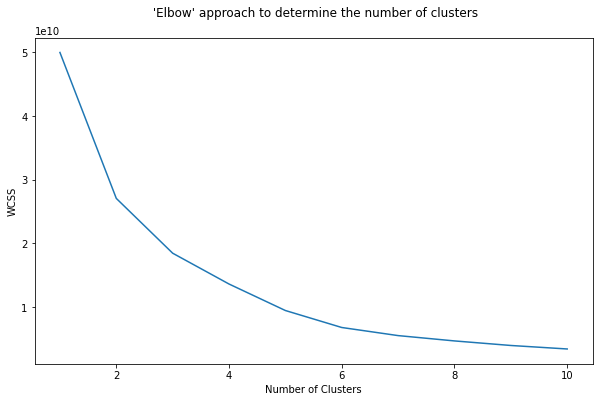

In [6]:
# KMeans is an unsupervised learning algorithm that aims to form  a specific number of clusters based on data similarity.
# For each dataset sample a cluster is assigned by taking into account its distance from the cluster centroids
# (assigned to the cluster with the smallest distance between the sample and the cluster centroid).
from sklearn.cluster import KMeans
kmeans_clusters = [KMeans(n_clusters=n, init='k-means++',random_state=0).fit(df_2dim) for n in range (1, 11)]
WCSS = [x.inertia_ for x in kmeans_clusters]

# Use of the 'Elbow' approach to determine the optimal clusters number
# As it can be observed, the value of WCSS (Within Cluster Summation of Squares) decreases at a smaller rate from Cluster 3
# to Cluster 4, from Cluster 4 to Cluster 5 etc. compared to the higher decrease rate from Cluster 1 to Cluster 2 and
# form Cluster 2 to Cluster 3. The WCSS descrease after Cluster 5 is significantly smaller and theoretically total number of
# clusters could take any value from 2 to 5 depending on the user's case study requirements
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), WCSS)
plt.title(" 'Elbow' approach to determine the number of clusters\n")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

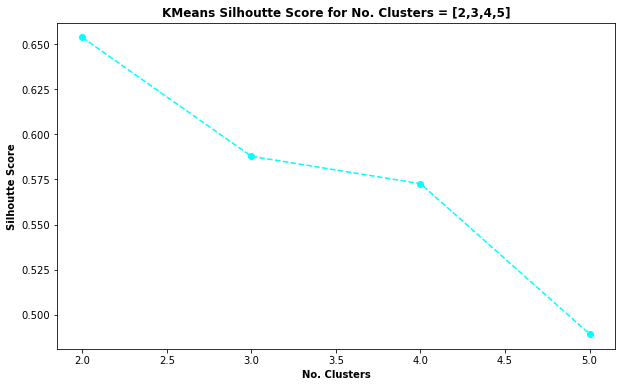

In [7]:
# Another option for determining the optimal number of clusters is to determine the 'Silhouette Score' for each cluster.
# 'Silhouette Score' evaluates how well each dataset sample is classified or how well the formed clusters are separated.
# It is equal to (d2-d1)/max(d1,d2), where 'd1' is the avg. distance between each dataset sample and all other samples
# within the same cluster and 'd2' the avg. distance between each dataset sample and all other samples that belong to 
# the nearest formed cluster. The higher the score, the more well separated/distinguished are the clusters

# Calculating the silhouette score for clusters 2,3,4,5 by use of sklearn.metrics silhouette_score
from sklearn.metrics import silhouette_score
silhouette_sc = [silhouette_score(df_2dim, x.labels_) for x in kmeans_clusters[1:5]]
plt.figure(figsize=(10,6))
plt.plot(range(2,6),silhouette_sc,color='cyan', marker='o', linestyle='dashed')
plt.xlabel('No. Clusters',fontweight='bold')
plt.ylabel('Silhoutte Score',fontweight='bold')
plt.title('KMeans Silhoutte Score for No. Clusters = [2,3,4,5]',fontweight='bold')
plt.show()

In [8]:
# Silhouette score 
i=1
for x in silhouette_sc:
    i=1+i
    print('Cluster {} Score: {} '.format(i,x))
    

Cluster 2 Score: 0.6536023529299154 
Cluster 3 Score: 0.5877839272105778 
Cluster 4 Score: 0.5726345581528665 
Cluster 5 Score: 0.4893600435151272 


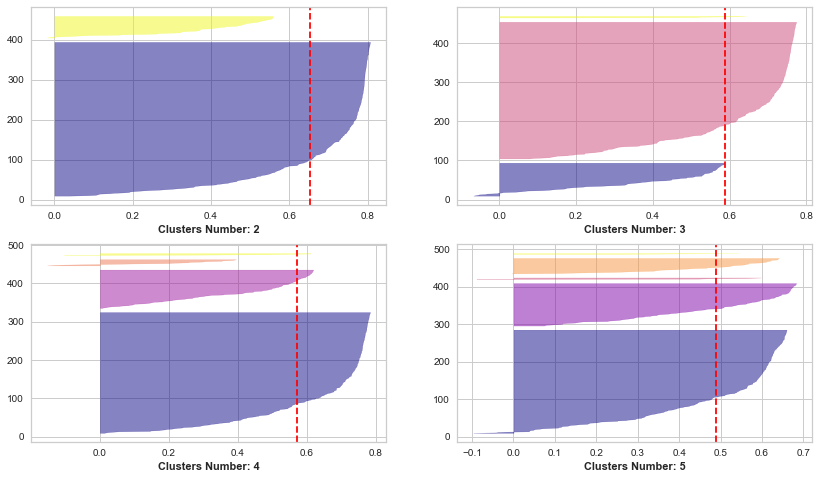

In [9]:
# Vizualizing the clusters [2,3,4,5] and the Silhouette score by use of SilhouetteVisualizer from yellobrick.cluster
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(14,8))
silhouettescore=[]
for i in [2,3,4,5]:
    plt.rcParams['font.size']=12
    plt.rcParams['font.weight']='bold'
    k_means=KMeans(n_clusters=i, init='k-means++', random_state=0)
    x, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(k_means, colors='plasma', ax=ax[x-1][mod])
    ax[x-1][mod].set_xlabel('Clusters Number: {}'.format(i),fontweight='bold')
    
    visualizer.fit(df_2dim)
    
    silhouettescore.append(visualizer.silhouette_score_ )

# By taking into consideration the 'Elbow' approach, the 'Silhouette' score &  the vizualizer, the use of 3 clusters seems
# to be the optimal solution as a) it has lower WCSS decrease rate ( Cluster 3 to CLuster 4) compared to the WCSS decrease
# rates from Cluster 1 to CLuster 2 and from CLuster 2 to Cluster 3 respectively, b) it has a relatively good Silhouette score
# compared to the scores of the other clusters, and 3) the scores of each class of Cluster 3 is >= the average Silhouette
# score represented by the vertical red dotted line. 
# In this case study, for demonstration purposes, examples of the Kmeans clustering algorithm are to be presented with the use
# of 2,3 & 4 clusters.
    
    

In [10]:
# Same score as with the sklearn.metrics silhouette_score
i=1
for x in silhouettescore:
    i=1+i
    print('Cluster {} Score: {} '.format(i,x))

Cluster 2 Score: 0.6536023529299154 
Cluster 3 Score: 0.5877839272105778 
Cluster 4 Score: 0.5726345581528665 
Cluster 5 Score: 0.4893600435151272 


In [11]:
# Selecting the values of each dataset feature
X_2dim=df_2dim.values

In [12]:
# Fitting KMeans algorithm to the dataset for Clusters number = 2
kmeans2clust = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_2clusters = kmeans2clust.fit_predict(X_2dim)

df_2dim['2_Clusters']=y_2clusters
df_2dim.head()

,Frozen,Grocery,2_Clusters
0,214,7561,0
1,1762,9568,0
2,2405,7684,0
3,6404,4221,0
4,3915,7198,0


In [13]:
# The labels assigned to each dataset sample for clusters number equal to 2
kmeans2clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

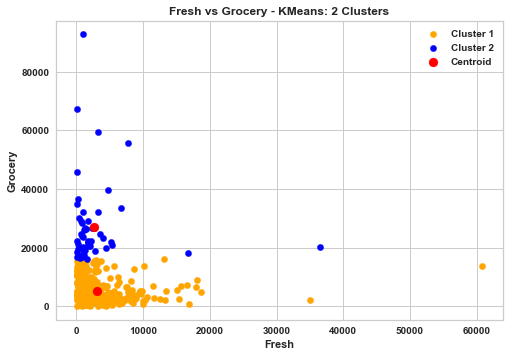

In [14]:
# Dataset Features Scatter Plot together with their cluster centers (Centroids)
plt.scatter(X_2dim[y_2clusters  == 0, 0], X_2dim[y_2clusters  == 0, 1], s = 40, c = 'orange', label = 'Cluster 1')
plt.scatter(X_2dim[y_2clusters  == 1, 0], X_2dim[y_2clusters  == 1, 1], s = 40, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans2clust.cluster_centers_[:, 0], kmeans2clust.cluster_centers_[:, 1], s = 80, c = 'red', label = 'Centroid')
plt.title('Fresh vs Grocery - KMeans: 2 Clusters',fontweight='bold')
plt.xlabel( 'Fresh',fontweight='bold')
plt.ylabel('Grocery',fontweight='bold')
plt.legend()
plt.show()

In [15]:
# Fitting KMeans algorithm to the dataset for Clusters number = 3
kmeans3clust = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_3clusters = kmeans3clust.fit_predict(X_2dim)

df_2dim['3_Clusters']=y_3clusters
df_2dim.head()

,Frozen,Grocery,2_Clusters,3_Clusters
0,214,7561,0,1
1,1762,9568,0,1
2,2405,7684,0,1
3,6404,4221,0,1
4,3915,7198,0,1


In [16]:
# The labels assigned to each dataset sample for clusters number equal to 3
kmeans3clust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

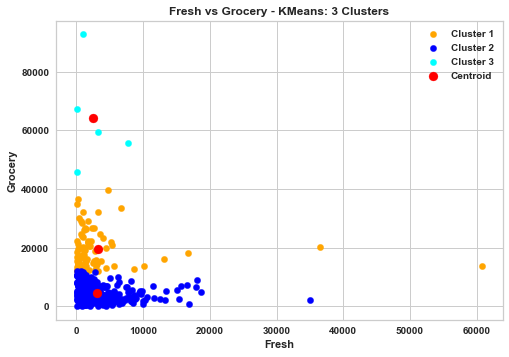

In [17]:
# Dataset Features Scatter Plot together with their cluster centers (Centroids)
plt.scatter(X_2dim[y_3clusters  == 0, 0], X_2dim[y_3clusters  == 0, 1], s = 40, c = 'orange', label = 'Cluster 1')
plt.scatter(X_2dim[y_3clusters  == 1, 0], X_2dim[y_3clusters  == 1, 1], s = 40, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2dim[y_3clusters  == 2, 0], X_2dim[y_3clusters  == 2, 1], s = 40, c = 'cyan', label = 'Cluster 3')
plt.scatter(kmeans3clust.cluster_centers_[:, 0], kmeans3clust.cluster_centers_[:, 1], s = 80, c = 'red', label = 'Centroid')
plt.title('Fresh vs Grocery - KMeans: 3 Clusters',fontweight='bold')
plt.xlabel( 'Fresh',fontweight='bold')
plt.ylabel('Grocery',fontweight='bold')
plt.legend()
plt.show()

In [18]:
# Fitting KMeans algorithm to the dataset for Clusters number = 4
kmeans4clust = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_4clusters = kmeans4clust.fit_predict(X_2dim)

df_2dim['4_Clusters']=y_4clusters
df_2dim.head()

,Frozen,Grocery,2_Clusters,3_Clusters,4_Clusters
0,214,7561,0,1,0
1,1762,9568,0,1,0
2,2405,7684,0,1,0
3,6404,4221,0,1,0
4,3915,7198,0,1,0


In [19]:
# The labels assigned to each dataset sample for clusters number equal to 4
kmeans4clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 3, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 3,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3, 1, 0,
       0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

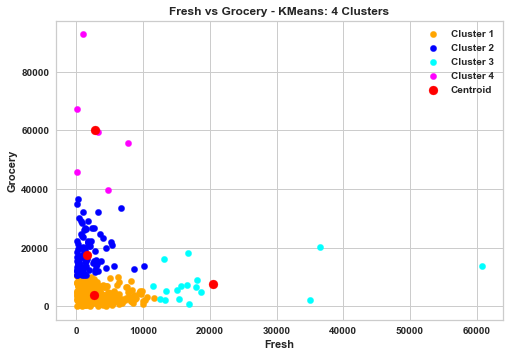

In [20]:
# Dataset Features Scatter Plot together with their cluster centers (Centroids)
plt.scatter(X_2dim[y_4clusters  == 0, 0], X_2dim[y_4clusters  == 0, 1], s = 40, c = 'orange', label = 'Cluster 1')
plt.scatter(X_2dim[y_4clusters  == 1, 0], X_2dim[y_4clusters  == 1, 1], s = 40, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2dim[y_4clusters  == 2, 0], X_2dim[y_4clusters  == 2, 1], s = 40, c = 'cyan', label = 'Cluster 3')
plt.scatter(X_2dim[y_4clusters  == 3, 0], X_2dim[y_4clusters  == 3, 1], s = 40, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans4clust.cluster_centers_[:, 0], kmeans4clust.cluster_centers_[:, 1], s = 80, c = 'red', label = 'Centroid')
plt.title('Fresh vs Grocery - KMeans: 4 Clusters',fontweight='bold')
plt.xlabel( 'Fresh',fontweight='bold')
plt.ylabel('Grocery',fontweight='bold')
plt.legend()
plt.show()

### New Inputs for KMeans Cluster Prediction

In [21]:
# New inputs for cluster prediction
new_inputs=[[12800,16200],
           [4500,800],
           [7800,55000]]




In [22]:
# New Inputs Cluster prediction (Number of Clusters =2 )
class_2_pred=kmeans2clust.predict(new_inputs)

i=0
for x in class_2_pred:
    i+=1
    print (' Case 2 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Case 2 Clusters: The predicted class for new input_1 is: 0
 Case 2 Clusters: The predicted class for new input_2 is: 0
 Case 2 Clusters: The predicted class for new input_3 is: 1


In [23]:
# New Inputs Cluster prediction (Number of Clusters =3 )
class_3_pred=kmeans3clust.predict(new_inputs)

i=0
for x in class_3_pred:
    i+=1
    print (' Case 3 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Case 3 Clusters: The predicted class for new input_1 is: 0
 Case 3 Clusters: The predicted class for new input_2 is: 1
 Case 3 Clusters: The predicted class for new input_3 is: 2


In [24]:
# New Inputs Cluster prediction (Number of Clusters =4 )
class_4_pred=kmeans4clust.predict(new_inputs)

i=0
for x in class_4_pred:
    i+=1
    print (' Case 4 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Case 4 Clusters: The predicted class for new input_1 is: 1
 Case 4 Clusters: The predicted class for new input_2 is: 0
 Case 4 Clusters: The predicted class for new input_3 is: 3


## b) Hierarchical Clustering

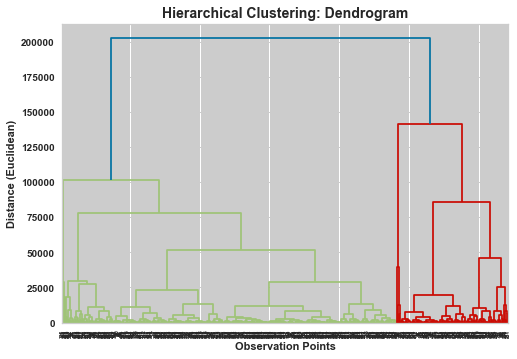

In [25]:
# Using the dendrogram to find the optimal number of clusters
# The optimal number of clusters has be determined by setting a dissimilarity threshold(horizontal line -along x-axis) that
# aims to select the clusters with Euclidean distance < dissimilarity threshold. The number of Clusters is equal to the 
# number of vertical lines(along-y-axis) that cross the horizontal line of dissimilarity threshold. For example, by setting
# the dissimilarity threshold at Euclidean distance value of 150000, there are two vertical lines that cross this threshold
# (the two vertical blue lines), therefore the number of clusters is equal to 2.
# If we wanted the dissimilarity threshold to be lower i.e 125000, then  there would be 3 vertical lines that cross this
# threshold (one blue and two red), thus the number of clusters would be equal to 3
# In this case study, the Hierarchical Clustering model is to be demonstrated with 2 and 3 clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_2dim, method = 'ward'))

plt.title('Hierarchical Clustering: Dendrogram',fontweight='bold',fontsize=14)
plt.xlabel('Observation Points',fontweight='bold')
plt.ylabel('Distance (Euclidean)',fontweight='bold')
plt.show()



In [26]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
h_cluster2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
h_pred2 = h_cluster2.fit_predict(X_2dim)
df_2dim['Hierchical']=h_pred2
df_2dim.head()

,Frozen,Grocery,2_Clusters,3_Clusters,4_Clusters,Hierchical
0,214,7561,0,1,0,1
1,1762,9568,0,1,0,1
2,2405,7684,0,1,0,1
3,6404,4221,0,1,0,1
4,3915,7198,0,1,0,1


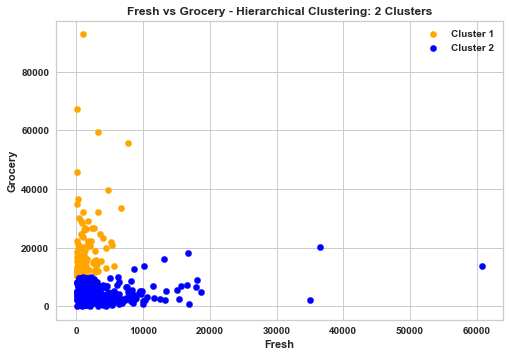

In [27]:
# Dataset Features Scatter Plot - Hierarchical Clustering: 2 Clusters
plt.scatter(X_2dim[h_pred2  == 0, 0], X_2dim[h_pred2  == 0, 1], s = 40, c = 'orange', label = 'Cluster 1')
plt.scatter(X_2dim[h_pred2  == 1, 0], X_2dim[h_pred2  == 1, 1], s = 40, c = 'blue', label = 'Cluster 2')
plt.title('Fresh vs Grocery - Hierarchical Clustering: 2 Clusters',fontweight='bold')
plt.xlabel( 'Fresh',fontweight='bold')
plt.ylabel('Grocery',fontweight='bold')
plt.legend()
plt.show()


In [28]:
# Fitting Hierarchical Clustering to the dataset - 3 Clusters
from sklearn.cluster import AgglomerativeClustering
h_cluster3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
h_pred3 = h_cluster3.fit_predict(X_2dim)
df_2dim['Hierchical']=h_pred3

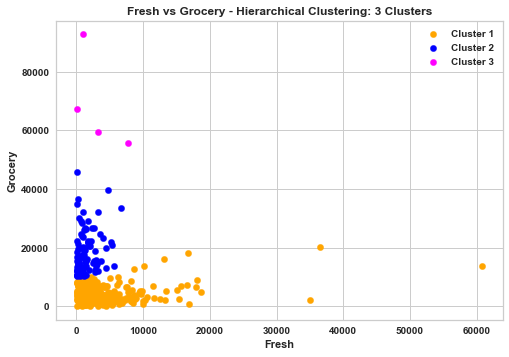

In [29]:
# Dataset Features Scatter Plot - Hierarchical Clustering: 3 Clusters
plt.scatter(X_2dim[h_pred3  == 0, 0], X_2dim[h_pred3  == 0, 1], s = 40, c = 'orange', label = 'Cluster 1')
plt.scatter(X_2dim[h_pred3  == 1, 0], X_2dim[h_pred3  == 1, 1], s = 40, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2dim[h_pred3  == 2, 0], X_2dim[h_pred3  == 2, 1], s = 40, c = 'magenta', label = 'Cluster 3')
plt.title('Fresh vs Grocery - Hierarchical Clustering: 3 Clusters',fontweight='bold')
plt.xlabel( 'Fresh',fontweight='bold')
plt.ylabel('Grocery',fontweight='bold')
plt.legend()
plt.show()

### New Inputs for Hierarchical Cluster Prediction

In [30]:
# New Inputs for Hierarchical Cluster prediction (Case 2 Clusters)
hierarchical_pred2=h_cluster2.fit_predict(new_inputs)

i=0
for x in hierarchical_pred2:
    i+=1
    print (' Hierarchical 2 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Hierarchical 2 Clusters: The predicted class for new input_1 is: 0
 Hierarchical 2 Clusters: The predicted class for new input_2 is: 0
 Hierarchical 2 Clusters: The predicted class for new input_3 is: 1


In [31]:
# New Inputs for Hierarchical Cluster prediction (Case 3 Clusters)
hierarchical_pred3=h_cluster3.fit_predict(new_inputs)

i=0
for x in hierarchical_pred3:
    i+=1
    print (' Hierarchical 3 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Hierarchical 3 Clusters: The predicted class for new input_1 is: 2
 Hierarchical 3 Clusters: The predicted class for new input_2 is: 1
 Hierarchical 3 Clusters: The predicted class for new input_3 is: 0


# PART B
## Multi-Dimensional Dataset - PCA (2 Components)


## a) KMeans Clustering

In [32]:
# Original Dataset
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [33]:
# Selecting the features that are to be used for determining the clusters
df_2comp=data.drop(['Channel','Region'],axis=1)
df_2comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


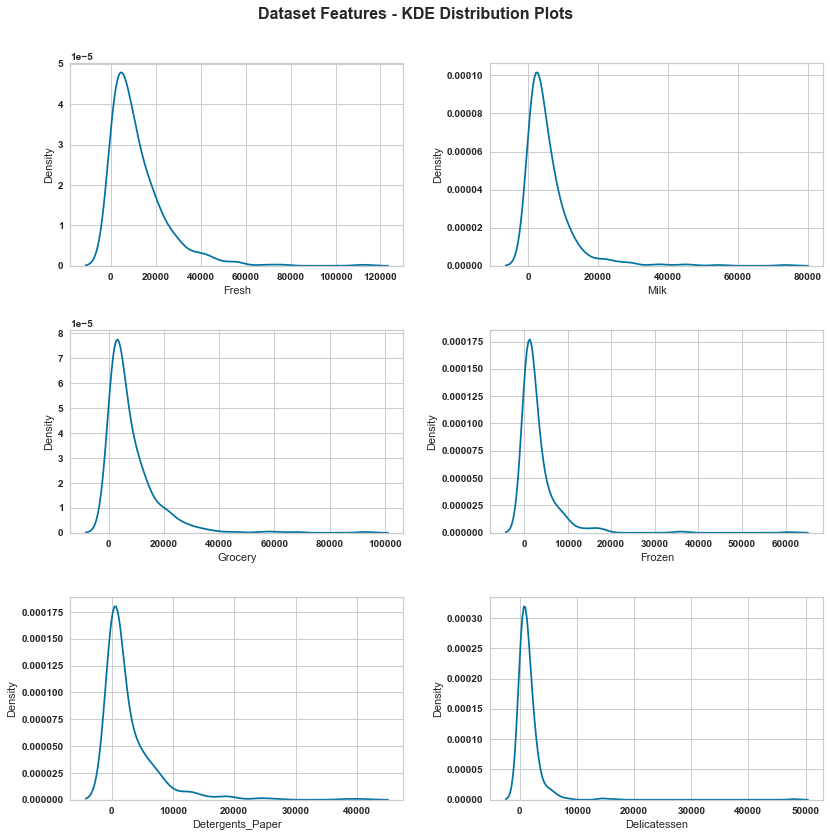

In [34]:
# Kernel Density Estimation plots
fig,axs=plt.subplots(3,2,figsize=(12,12))
sns.kdeplot(df_2comp['Fresh'],ax=axs[0,0])
sns.kdeplot(df_2comp['Milk'],ax=axs[0,1])
sns.kdeplot(df_2comp['Grocery'],ax=axs[1,0])
sns.kdeplot(df_2comp['Frozen'],ax=axs[1,1])
sns.kdeplot(df_2comp['Detergents_Paper'],ax=axs[2,0])
sns.kdeplot(df_2comp['Delicatessen'],ax=axs[2,1])

for ax in axs.flat:
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Dataset Features - KDE Distribution Plots", fontweight='bold',fontsize=16)
    ax.figure.tight_layout(pad=2)

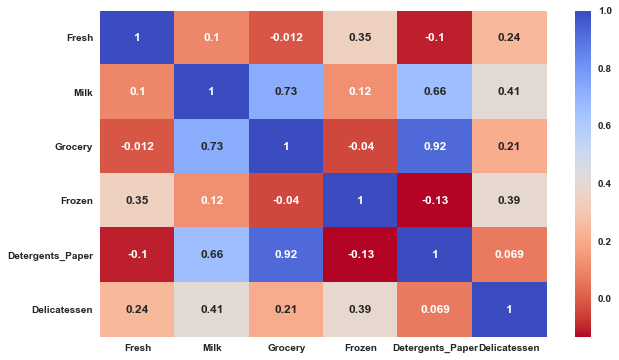

In [35]:
# Heatmap providing the correlations between the dataset features.
# Correlation varies between -1 and 1, where a) values close to 1 indicate positive correlation, b) values close to -1
# indicate negative correlation between two variables and c) values close to zero indicate no correlation.
from matplotlib import cm
cmap = cm.coolwarm
cmap_rev = cm.get_cmap('coolwarm_r')
plt.figure(figsize=(10,6))
sns.heatmap(df_2comp.corr(),annot=True,cmap=cmap_rev)
plt.show()

In [36]:
# Rescaling the input features prior to applying Principal Component Analysis by use of MinMaxScaler
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_sc=scaler.fit_transform(df_2comp)

In [37]:
# Use of PCA for Dimensionality Reduction.
# PCA determines dataset dimensions that explain maximum variance.
# In this case study, the scope is to apply PCA with 2 components (dimensionality reduction to 2)
from sklearn.decomposition import PCA
xpca=PCA(n_components=2)
X_pca = xpca.fit_transform(X_sc)
# Applying PCA with two components results in an explained variance ratio of 78.3%
explained_variance=np.cumsum(xpca.explained_variance_ratio_)
explained_variance

array([0.51948323, 0.7835533 ])

In [38]:
# Input features shape after applying PCA
X_pca.shape

(440, 2)

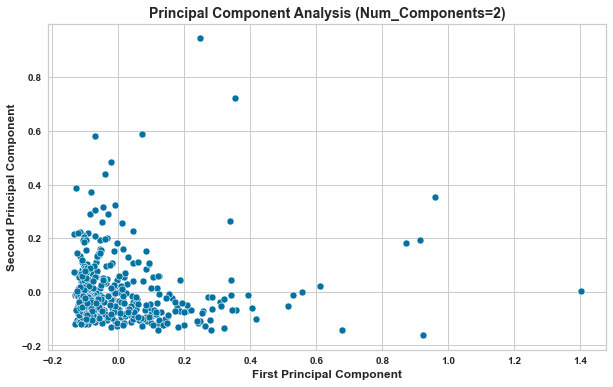

In [39]:
# Plot of the two PCA input features
df_pca=pd.DataFrame(X_pca,columns=['PCA1','PCA2'])
plt.figure(figsize=(10,6))
sns.scatterplot('PCA1','PCA2',data=df_pca)
plt.xlabel('First Principal Component', fontweight='bold',fontsize=12)
plt.ylabel('Second Principal Component', fontweight='bold',fontsize=12)
plt.title('Principal Component Analysis (Num_Components=2)', fontweight='bold',fontsize=14)
plt.show()

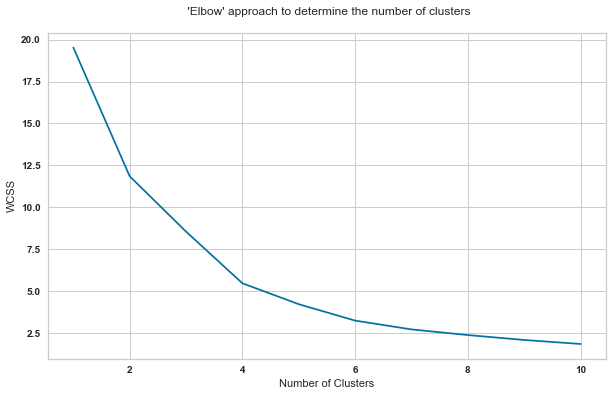

In [40]:
# KMeans is an unsupervised learning algorithm that aims to form  a specific number of clusters based on data similarity.
# For each dataset sample a cluster is assigned by taking into account its distance from the cluster centroids
# (assigned to the cluster with the smallest distance between the sample and the cluster centroid).
from sklearn.cluster import KMeans
kmeans_clusters = [KMeans(n_clusters=n, init='k-means++',random_state=0).fit(X_pca) for n in range (1, 11)]
WCSS = [x.inertia_ for x in kmeans_clusters]

# Use of the 'Elbow' approach to determine the optimal clusters number
# As it can be observed, the value of WCSS (Within Cluster Summation of Squares) decreases at a smaller rate from Cluster 3
# to Cluster 4, from Cluster 4 to Cluster 5 etc. compared to the higher decrease rate from Cluster 1 to Cluster 2 and
# form Cluster 2 to Cluster 3. The WCSS descrease after Cluster 5 is significantly smaller and theoretically total number of
# clusters could take any value from 2 to 5 depending on the user's case study requirements
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), WCSS)
plt.title(" 'Elbow' approach to determine the number of clusters\n")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

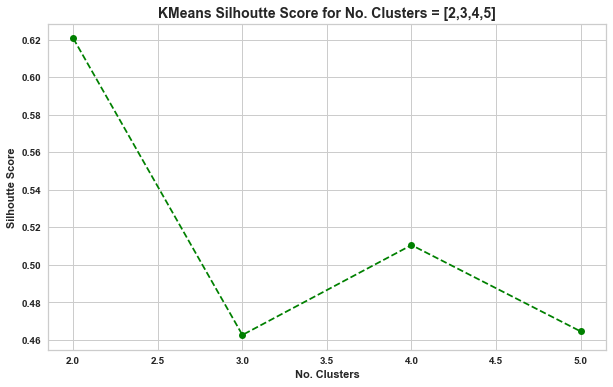

In [41]:
# Another option for determining the optimal number of clusters is to determine the 'Silhouette Score' for each cluster.
# 'Silhouette Score' evaluates how well each dataset sample is classified or how well the formed clusters are separated.
# It is equal to (d2-d1)/max(d1,d2), where 'd1' is the avg. distance between each dataset sample and all other samples
# within the same cluster and 'd2' the avg. distance between each dataset sample and all other samples that belong to 
# the nearest formed cluster. The higher the score, the more well separated/distinguished are the clusters

# Calculating the silhouette score for clusters 2,3,4,5 by use of sklearn.metrics silhouette_score
from sklearn.metrics import silhouette_score
silhouette_sc = [silhouette_score(X_pca, x.labels_) for x in kmeans_clusters[1:5]]
plt.figure(figsize=(10,6))
plt.plot(range(2,6),silhouette_sc,color='green', marker='o', linestyle='dashed')
plt.xlabel('No. Clusters',fontweight='bold')
plt.ylabel('Silhoutte Score',fontweight='bold')
plt.title('KMeans Silhoutte Score for No. Clusters = [2,3,4,5]',fontweight='bold',fontsize=14)
plt.show()

In [42]:
# Silhouette Score
i=1
for x in silhouette_sc:
    i=1+i
    print('Cluster {} Score: {} '.format(i,x))
    

Cluster 2 Score: 0.6206142183312632 
Cluster 3 Score: 0.46269645029316203 
Cluster 4 Score: 0.5105764845411437 
Cluster 5 Score: 0.4646192336944846 


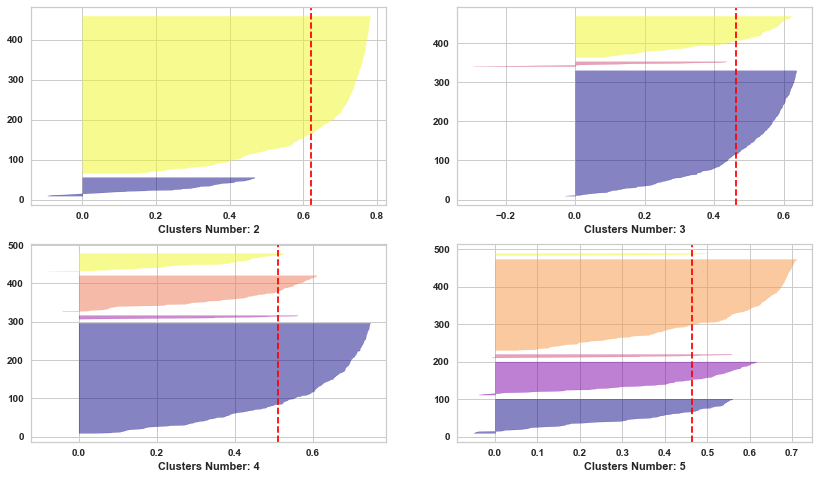

In [43]:
# Vizualizing the clusters [2,3,4,5] and the Silhouette score by use of SilhouetteVisualizer from yellobrick.cluster
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(14,8))
silhouettescore=[]
for i in [2,3,4,5]:
    plt.rcParams['font.size']=12
    plt.rcParams['font.weight']='bold'
    k_means=KMeans(n_clusters=i, init='k-means++', random_state=0)
    x, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(k_means, colors='plasma', ax=ax[x-1][mod])
    ax[x-1][mod].set_xlabel('Clusters Number: {}'.format(i),fontweight='bold')
    
    visualizer.fit(X_pca)
    
    silhouettescore.append(visualizer.silhouette_score_ )
   

   
# By taking into consideration the 'Elbow' approach, the 'Silhouette' score &  the vizualizer, the use of 4 clusters seems
# to be the optimal solution as a) it has lower WCSS decrease rate ( Cluster 4 to CLuster 5) compared to the WCSS decrease
# rates from Cluster 2 to CLuster 3 and from CLuster 3 to Cluster 4 respectively, b) it has a relatively good Silhouette score
# compared to the scores of the other clusters, and 3) the scores of each class of Cluster 4 is >= the average Silhouette
# score represented by the vertical red dotted line. 

# Ideally, the widths of each class of a cluster should be similar but this is not the case for any of the examined cases. 
# Cluster 2 score is high but the second class score of this cluster is significantly below the average score
# Cluster 3 could be another choice, despite the fact that one score of its classes is less than the average score
# Cluster 5 has the disadvantage of not having classes with similar widths
# In this case study, for demonstration purposes, examples of the Kmeans clustering algorithm are to be presented with the use
# of 2,3 & 4 clusters.
# It needs to be mentioned though, that the selection of number of clusters is up to the user as it depends on
# many factors such as the requirements of the case study/project/scenario.


In [44]:
# Same score as with the sklearn.metrics silhouette_score
i=1
for x in silhouettescore:
    i=1+i
    print('Cluster {} Score: {} '.format(i,x))

Cluster 2 Score: 0.6206142183312632 
Cluster 3 Score: 0.46269645029316203 
Cluster 4 Score: 0.5105764845411437 
Cluster 5 Score: 0.4646192336944846 


In [45]:
# Fitting KMeans algorithm to the dataset for Clusters number = 2
kmeans2clust = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_2clusters = kmeans2clust.fit_predict(X_pca)
df_2comp['2_Clusters']=y_2clusters
df_2comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


In [46]:
# The labels assigned to each dataset sample for clusters number equal to 2
kmeans2clust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

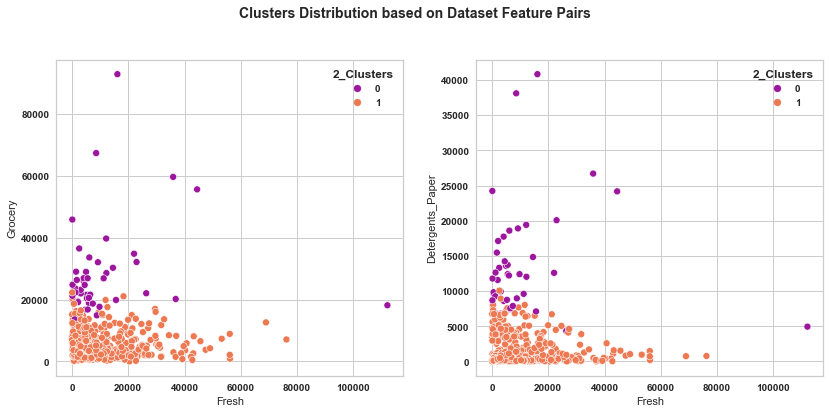

In [47]:
# Example of Clusters Distribution based on Dataset Feature Pairs (Clusters number = 2)
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_2comp, x='Fresh', y='Grocery', hue='2_Clusters',palette='plasma',ax=axs[0])
sns.scatterplot(data=df_2comp, x='Fresh', y='Detergents_Paper', hue='2_Clusters',palette='plasma',ax=axs[1])


for ax in axs.flat:
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=14)
    ax.figure.tight_layout(pad=2)
    plt.show()

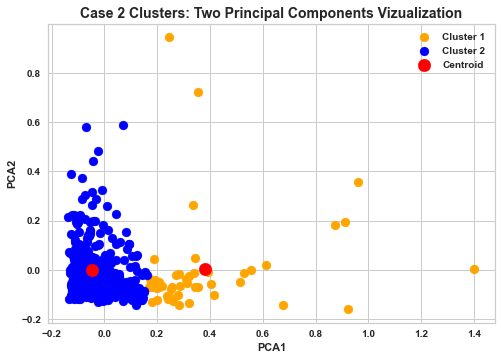

In [48]:
# Visualising the clusters with PCA components
plt.scatter(X_pca[y_2clusters == 0, 0], X_pca[y_2clusters == 0, 1], s = 80, c = 'orange', label = 'Cluster 1')
plt.scatter(X_pca[y_2clusters == 1, 0], X_pca[y_2clusters == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans2clust.cluster_centers_[:, 0], kmeans2clust.cluster_centers_[:, 1], s = 160, c = 'red', label = 'Centroid')
plt.title('Case 2 Clusters: Two Principal Components Vizualization', fontweight='bold',fontsize=14)
plt.xlabel( 'PCA1',fontweight='bold')
plt.ylabel('PCA2',fontweight='bold')
plt.legend()
plt.show()

In [49]:
# Fitting KMeans algorithm to the dataset for Clusters number = 3
kmeans3clust = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_3clusters = kmeans3clust.fit_predict(X_pca)

df_2comp['3_Clusters']=y_3clusters
df_2comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters,3_Clusters
0,12669,9656,7561,214,2674,1338,1,0
1,7057,9810,9568,1762,3293,1776,1,2
2,6353,8808,7684,2405,3516,7844,1,2
3,13265,1196,4221,6404,507,1788,1,0
4,22615,5410,7198,3915,1777,5185,1,0


In [50]:
# The labels assigned to each dataset sample for clusters number equal to 3
kmeans3clust.labels_

array([0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,

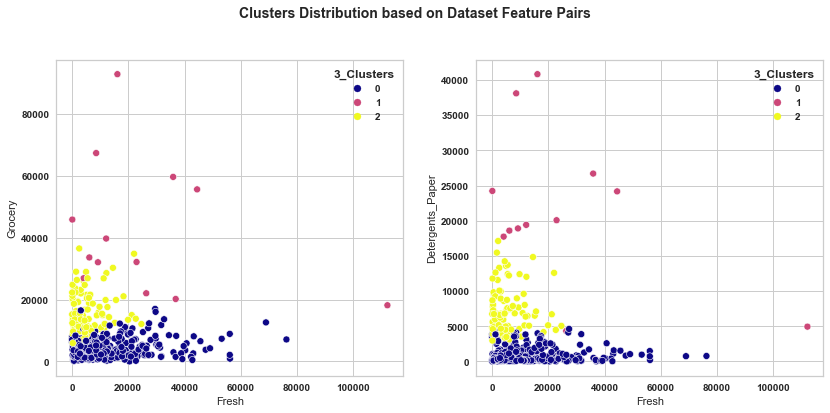

In [51]:
# Example of Clusters Distribution based on Dataset Feature Pairs (Clusters number = 3)
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_2comp, x='Fresh', y='Grocery', hue='3_Clusters',palette='plasma',ax=axs[0])

sns.scatterplot(data=df_2comp, x='Fresh', y='Detergents_Paper', hue='3_Clusters',palette='plasma',ax=axs[1])


for ax in axs.flat:
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=14)
    ax.figure.tight_layout(pad=2)
    plt.show()




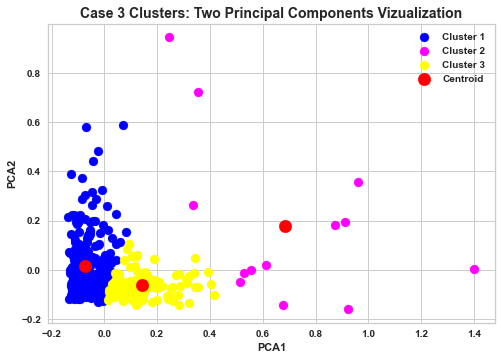

In [52]:
# Visualising the clusters with PCA components
plt.scatter(X_pca[y_3clusters == 0, 0], X_pca[y_3clusters == 0, 1], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(X_pca[y_3clusters == 1, 0], X_pca[y_3clusters == 1, 1], s = 80, c = 'magenta', label = 'Cluster 2')
plt.scatter(X_pca[y_3clusters == 2, 0], X_pca[y_3clusters == 2, 1], s = 80, c = 'yellow', label = 'Cluster 3')
plt.scatter(kmeans3clust.cluster_centers_[:, 0], kmeans3clust.cluster_centers_[:, 1], s = 160, c = 'red', label = 'Centroid')
plt.title('Case 3 Clusters: Two Principal Components Vizualization', fontweight='bold',fontsize=14)
plt.xlabel( 'PCA1',fontweight='bold')
plt.ylabel('PCA2',fontweight='bold')
plt.legend()
plt.show()

In [53]:
# Fitting KMeans algorithm to the dataset for Clusters number = 4
kmeans4clust = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_4clusters = kmeans4clust.fit_predict(X_pca)

df_2comp['4_Clusters']=y_4clusters
df_2comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters,3_Clusters,4_Clusters
0,12669,9656,7561,214,2674,1338,1,0,0
1,7057,9810,9568,1762,3293,1776,1,2,2
2,6353,8808,7684,2405,3516,7844,1,2,0
3,13265,1196,4221,6404,507,1788,1,0,0
4,22615,5410,7198,3915,1777,5185,1,0,0


In [54]:
# The labels assigned to each dataset sample for clusters number equal to 4
kmeans4clust.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       3, 2, 2, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 3, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 3,
       0, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       3, 0, 0, 0, 0, 3, 2, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 3, 2,
       0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

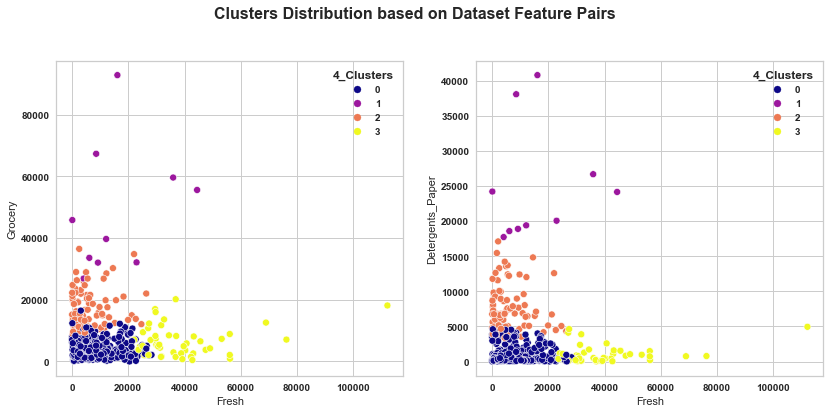

In [55]:
# Example of Clusters Distribution based on Dataset Feature Pairs (Clusters number = 4)
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_2comp, x='Fresh', y='Grocery', hue='4_Clusters',palette='plasma',ax=axs[0])

sns.scatterplot(data=df_2comp, x='Fresh', y='Detergents_Paper', hue='4_Clusters',palette='plasma',ax=axs[1])


for ax in axs.flat:
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=16)
    ax.figure.tight_layout(pad=2)
    plt.show()


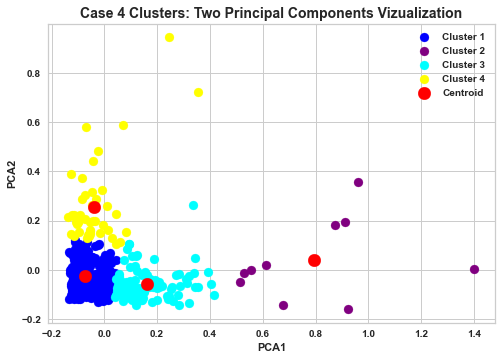

In [56]:
# Visualising the clusters with PCA components
plt.scatter(X_pca[y_4clusters == 0, 0], X_pca[y_4clusters == 0, 1], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(X_pca[y_4clusters == 1, 0], X_pca[y_4clusters == 1, 1], s = 80, c = 'purple', label = 'Cluster 2')
plt.scatter(X_pca[y_4clusters == 2, 0], X_pca[y_4clusters == 2, 1], s = 80, c = 'cyan', label = 'Cluster 3')
plt.scatter(X_pca[y_4clusters == 3, 0], X_pca[y_4clusters == 3, 1], s = 80, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans4clust.cluster_centers_[:, 0], kmeans4clust.cluster_centers_[:, 1], s = 160, c = 'red', label = 'Centroid')
plt.title('Case 4 Clusters: Two Principal Components Vizualization', fontweight='bold',fontsize=14)
plt.xlabel( 'PCA1',fontweight='bold')
plt.ylabel('PCA2',fontweight='bold')
plt.legend()
plt.show()

In [57]:
# Importing Axes3D for 3D plots
from mpl_toolkits.mplot3d import Axes3D
# Selecting this option for 3D rotation:->  %matplotlib notebook

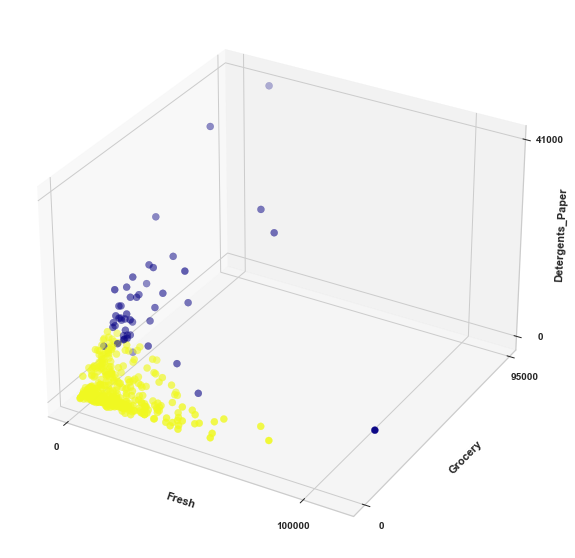

In [58]:
# 3D plot - Clusters Distribution based on 3 Dataset Features (Clusters number = 2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_2comp['Fresh'],df_2comp['Grocery'],df_2comp['Detergents_Paper'],c=kmeans2clust.labels_,cmap='plasma',s=50)
ax.set_xlabel('Fresh',fontweight='bold')
ax.set_ylabel('Grocery',fontweight='bold')
ax.set_zlabel('Detergents_Paper',fontweight='bold')
ax.set_xticks([0,100000])
ax.set_yticks([0,95000])
ax.set_zticks([0,41000])
plt.show()

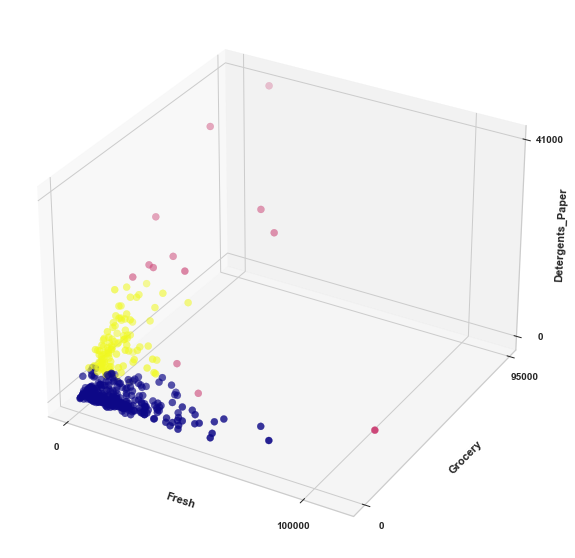

In [59]:
# 3D plot - Clusters Distribution based on 3 Dataset Features (Clusters number = 3)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_2comp['Fresh'],df_2comp['Grocery'],df_2comp['Detergents_Paper'],c=kmeans3clust.labels_,cmap='plasma',s=50)
ax.set_xlabel('Fresh',fontweight='bold')
ax.set_ylabel('Grocery',fontweight='bold')
ax.set_zlabel('Detergents_Paper',fontweight='bold')
ax.set_xticks([0,100000])
ax.set_yticks([0,95000])
ax.set_zticks([0,41000])
plt.show()


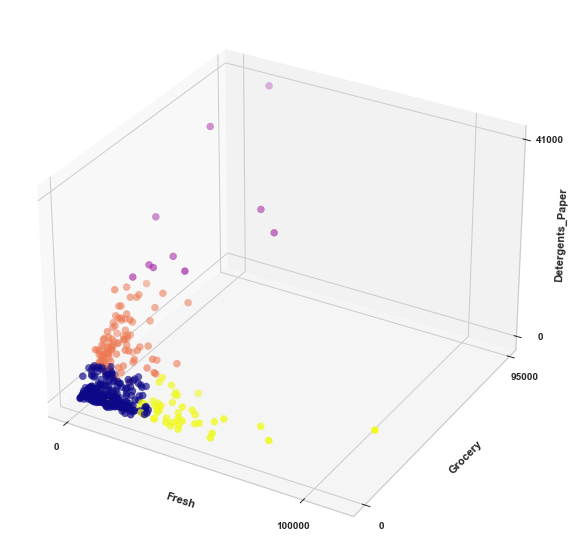

In [60]:
# 3D plot - Clusters Distribution based on 3 Dataset Features (Clusters number = 4)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_2comp['Fresh'],df_2comp['Grocery'],df_2comp['Detergents_Paper'],c=kmeans4clust.labels_,cmap='plasma',s=50)
ax.set_xlabel('Fresh',fontweight='bold')
ax.set_ylabel('Grocery',fontweight='bold')
ax.set_zlabel('Detergents_Paper',fontweight='bold')
ax.set_xticks([0,100000])
ax.set_yticks([0,95000])
ax.set_zticks([0,41000])
plt.show()

### New Inputs for KMeans Cluster Prediction

In [61]:
# New Inputs
new_inputs=[[39000,1400,800,4500,100,2400],
           [14700,15500,30200,400,15000,1800],
           [10300,2000,2200,1000,175,2100],
           [10000,4000,3000,400,1000,2500]]

#Rescaling the new inputs
sc_new_inputs=scaler.transform(new_inputs)
# Rescaling new inputs are transformed (PCA)
X_new=xpca.transform(sc_new_inputs)


In [62]:
# New Inputs Cluster prediction (Number of Clusters =2 )
class_2_pred=kmeans2clust.predict(X_new)

i=0
for x in class_2_pred:
    i+=1
    print (' Case 2 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Case 2 Clusters: The predicted class for new input_1 is: 1
 Case 2 Clusters: The predicted class for new input_2 is: 0
 Case 2 Clusters: The predicted class for new input_3 is: 1
 Case 2 Clusters: The predicted class for new input_4 is: 1


In [63]:
# New Inputs Cluster prediction (Number of Clusters =3 )
class_3_pred=kmeans3clust.predict(X_new)

i=0
for x in class_3_pred:
    i+=1
    print (' Case 3 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Case 3 Clusters: The predicted class for new input_1 is: 0
 Case 3 Clusters: The predicted class for new input_2 is: 2
 Case 3 Clusters: The predicted class for new input_3 is: 0
 Case 3 Clusters: The predicted class for new input_4 is: 0


In [64]:
# New Inputs Cluster prediction (Number of Clusters =4 )
class_4_pred=kmeans4clust.predict(X_new)

i=0
for x in class_4_pred:
    i+=1
    print (' Case 4 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Case 4 Clusters: The predicted class for new input_1 is: 3
 Case 4 Clusters: The predicted class for new input_2 is: 2
 Case 4 Clusters: The predicted class for new input_3 is: 0
 Case 4 Clusters: The predicted class for new input_4 is: 0


## b) Hierarchical Clustering

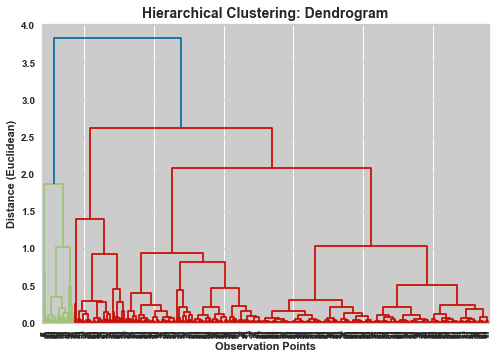

In [65]:
# Using the dendrogram to find the optimal number of clusters
# The optimal number of clusters has be determined by setting a dissimilarity threshold(horizontal line -along x-axis) that
# aims to select the clusters with Euclidean distance < dissimilarity threshold. The number of Clusters is equal to the 
# number of vertical lines(along-y-axis) that cross the horizontal line of dissimilarity threshold. For example, by setting
# the dissimilarity threshold at Euclidean distance (PCA transformed) value of 3, there are two vertical lines that
#  cross this threshold (the two vertical blue lines), therefore the number of clusters is equal to 2.
# If we wanted the dissimilarity threshold to be lower i.e 2.5, then  there would be 3 vertical lines that cross this
# threshold (one blue and two red), thus the number of clusters would be equal to 3
# In this case study, the Hierarchical Clustering model is to be demonstrated with 2 and 3 clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))

plt.title('Hierarchical Clustering: Dendrogram',fontweight='bold',fontsize=14)
plt.xlabel('Observation Points',fontweight='bold')
plt.ylabel('Distance (Euclidean)',fontweight='bold')
plt.show()



In [66]:
# Fitting Hierarchical Clustering to the dataset - Case 2 Clusters
from sklearn.cluster import AgglomerativeClustering
h_cluster2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
h_pred2 = h_cluster2.fit_predict(X_pca)
df_2comp['Hierchical_2']=h_pred2
df_2comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters,3_Clusters,4_Clusters,Hierchical_2
0,12669,9656,7561,214,2674,1338,1,0,0,0
1,7057,9810,9568,1762,3293,1776,1,2,2,0
2,6353,8808,7684,2405,3516,7844,1,2,0,0
3,13265,1196,4221,6404,507,1788,1,0,0,0
4,22615,5410,7198,3915,1777,5185,1,0,0,0


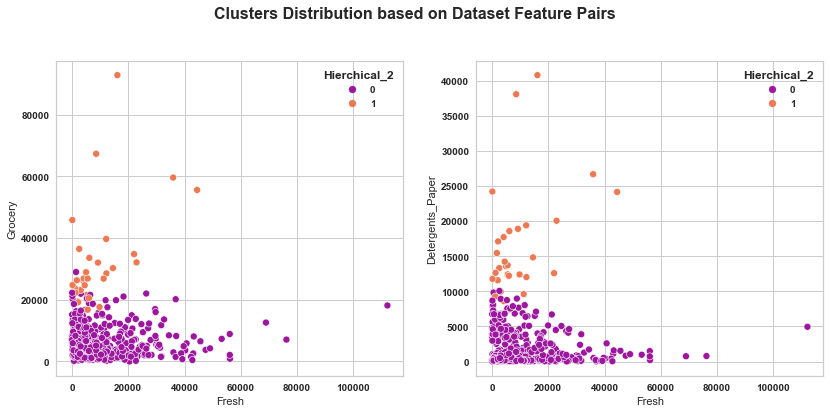

In [67]:
# Dataset Features Scatter Plot - Hierarchical Clustering: 2 Clusters
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_2comp, x='Fresh', y='Grocery', hue='Hierchical_2',palette='plasma',ax=axs[0])
sns.scatterplot(data=df_2comp, x='Fresh', y='Detergents_Paper', hue='Hierchical_2',palette='plasma',ax=axs[1])




for ax in axs.flat:
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=16)
    ax.figure.tight_layout(pad=2)
    plt.show()

In [68]:
# Fitting Hierarchical Clustering to the dataset - Case 3 Clusters
from sklearn.cluster import AgglomerativeClustering
h_cluster3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
h_pred3 = h_cluster3.fit_predict(X_pca)
df_2comp['Hierchical_3']=h_pred3
df_2comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters,3_Clusters,4_Clusters,Hierchical_2,Hierchical_3
0,12669,9656,7561,214,2674,1338,1,0,0,0,0
1,7057,9810,9568,1762,3293,1776,1,2,2,0,0
2,6353,8808,7684,2405,3516,7844,1,2,0,0,0
3,13265,1196,4221,6404,507,1788,1,0,0,0,0
4,22615,5410,7198,3915,1777,5185,1,0,0,0,2


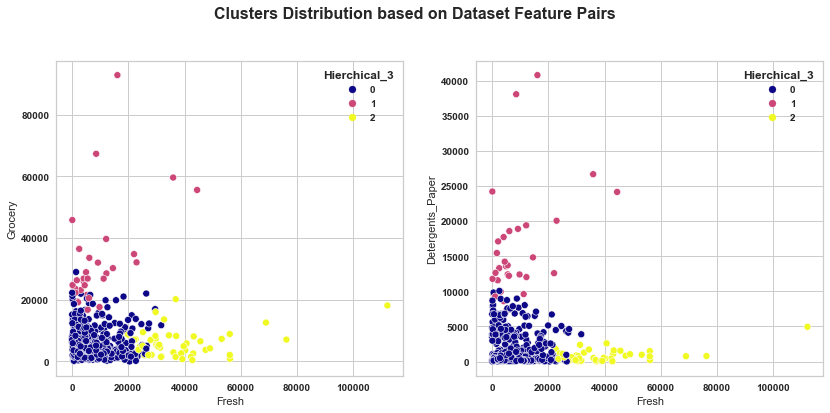

In [69]:
# Dataset Features Scatter Plot - Hierarchical Clustering: 3 Clusters
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_2comp, x='Fresh', y='Grocery', hue='Hierchical_3',palette='plasma',ax=axs[0])
sns.scatterplot(data=df_2comp, x='Fresh', y='Detergents_Paper', hue='Hierchical_3',palette='plasma',ax=axs[1])




for ax in axs.flat:
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=16)
    ax.figure.tight_layout(pad=2)
    plt.show()

### New Inputs for Hierarchical Cluster Prediction

In [70]:
# New Inputs for Hierarchical Cluster prediction (Case 2 Clusters)
hierarchical_pred2=h_cluster2.fit_predict(X_new)

i=0
for x in hierarchical_pred2:
    i+=1
    print (' Hierarchical 2 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Hierarchical 2 Clusters: The predicted class for new input_1 is: 0
 Hierarchical 2 Clusters: The predicted class for new input_2 is: 1
 Hierarchical 2 Clusters: The predicted class for new input_3 is: 0
 Hierarchical 2 Clusters: The predicted class for new input_4 is: 0


In [71]:
# New Inputs for Hierarchical Cluster prediction (Case 3 Clusters)
hierarchical_pred3=h_cluster3.fit_predict(X_new)

i=0
for x in hierarchical_pred3:
    i+=1
    print (' Hierarchical 2 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Hierarchical 2 Clusters: The predicted class for new input_1 is: 2
 Hierarchical 2 Clusters: The predicted class for new input_2 is: 1
 Hierarchical 2 Clusters: The predicted class for new input_3 is: 0
 Hierarchical 2 Clusters: The predicted class for new input_4 is: 0


# PART C
## Multi-Dimensional Dataset - PCA (4 Components)


## a) KMeans Clustering

In [72]:
# Importing the dataset
data=pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [73]:
# Column Renaming
data=data.rename(columns={'Delicassen':'Delicatessen'})
data.columns.unique()

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [74]:
# Selecting the features that are to be used for determining the clusters
df_4comp=data.drop(['Channel','Region'],axis=1)
df_4comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [75]:
# Rescaling the input features prior to applying Principal Component Analysis by use of MinMaxScaler
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_sc=scaler.fit_transform(df_4comp)

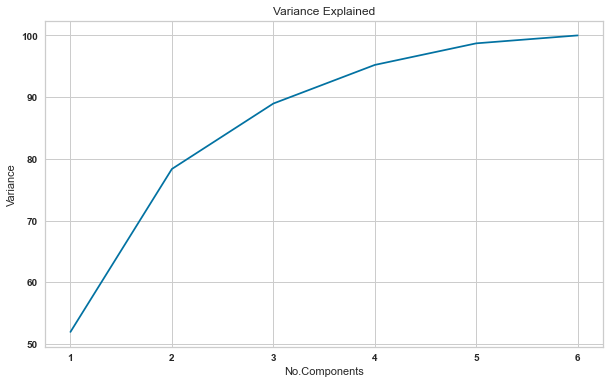

In [76]:
# Use of PCA for Dimensionality Reduction.
# PCA determines dataset dimensions that explain maximum variance
from sklearn.decomposition import PCA
pca = PCA().fit(X_sc)
explained_variance=np.cumsum(pca.explained_variance_ratio_*100)
# Plot that presents the explained variance percentage for different numbers of components (from 1 to 6)
plt.figure(figsize=(10,6))
plt.plot(range(1,7),explained_variance)
plt.xlabel('No.Components')
plt.ylabel('Variance')
plt.title('Variance Explained')
plt.show()

In [77]:
# Explained variance (1-100) for 1 to 6 PCA Components
explained_variance

array([ 51.94832335,  78.35533021,  88.96142978,  95.21944596,
        98.7168684 , 100.        ])

In [78]:
# 4 PCA components have been selected for dimensionality reduction as they can explain 95% of the maximum variance
xpca=PCA(n_components=4)
X_pca = xpca.fit_transform(X_sc)

In [79]:
# Shape after dimensionality reduction
X_pca.shape

(440, 4)

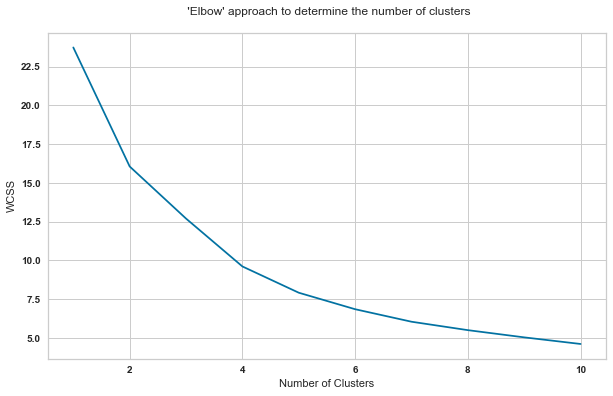

In [80]:
# KMeans is an unsupervised learning algorithm that aims to form  a specific number of clusters based on data similarity.
# For each dataset sample a cluster is assigned by taking into account its distance from the cluster centroids
# (assigned to the cluster with the smallest distance between the sample and the cluster centroid).
from sklearn.cluster import KMeans
kmeans_clusters = [KMeans(n_clusters=n, init='k-means++',random_state=0).fit(X_pca) for n in range (1, 11)]
WCSS = [x.inertia_ for x in kmeans_clusters]

# Use of the 'Elbow' approach to determine the optimal clusters number
# As it can be observed, the value of WCSS (Within Cluster Summation of Squares) decreases at a smaller rate from Cluster 3
# to Cluster 4, from Cluster 4 to Cluster 5 etc. compared to the higher decrease rate from Cluster 1 to Cluster 2 and
# form Cluster 2 to Cluster 3. The WCSS descrease after Cluster 5 is significant smaller and theoreticaly total number of
# clusters could take any value from 3 to 5 depending on the user's case study requirements
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), WCSS)
plt.title(" 'Elbow' approach to determine the number of clusters\n")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

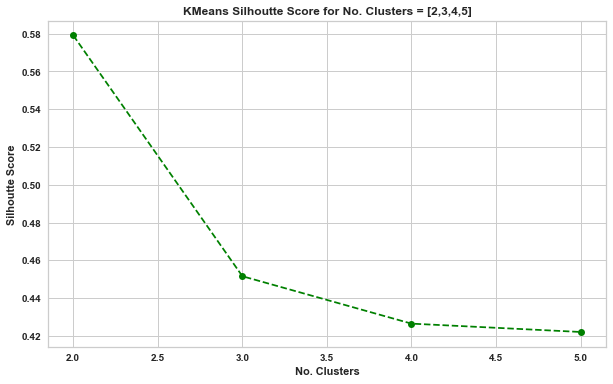

In [81]:
# Another option for determining the optimal number of clusters is to determine the 'Silhouette Score' for each cluster.
# 'Silhouette Score' evaluates how well each dataset sample is classified or how well the formed clusters are separated.
# It is equal to (d2-d1)/max(d1,d2), where 'd1' is the avg. distance between each dataset sample and all other samples
# within the same cluster and 'd2' the avg. distance between each dataset sample and all other samples that belong to 
# the nearest formed cluster. The higher the score, the more well separated/distinguished are the clusters

# Calculating the silhouette score for clusters 2,3,4,5 by use of sklearn.metrics silhouette_score
from sklearn.metrics import silhouette_score
silhouette_sc = [silhouette_score(X_pca, x.labels_) for x in kmeans_clusters[1:5]]
plt.figure(figsize=(10,6))
plt.plot(range(2,6),silhouette_sc,color='green', marker='o', linestyle='dashed')
plt.xlabel('No. Clusters',fontweight='bold')
plt.ylabel('Silhoutte Score',fontweight='bold')
plt.title('KMeans Silhoutte Score for No. Clusters = [2,3,4,5]',fontweight='bold')
plt.show()



In [82]:
# Silhouette Score
i=1
for x in silhouette_sc:
    i=1+i
    print('Cluster {} Score: {} '.format(i,x))
    

Cluster 2 Score: 0.5790805137581542 
Cluster 3 Score: 0.45157594153331243 
Cluster 4 Score: 0.4264733479080678 
Cluster 5 Score: 0.4220569753757605 


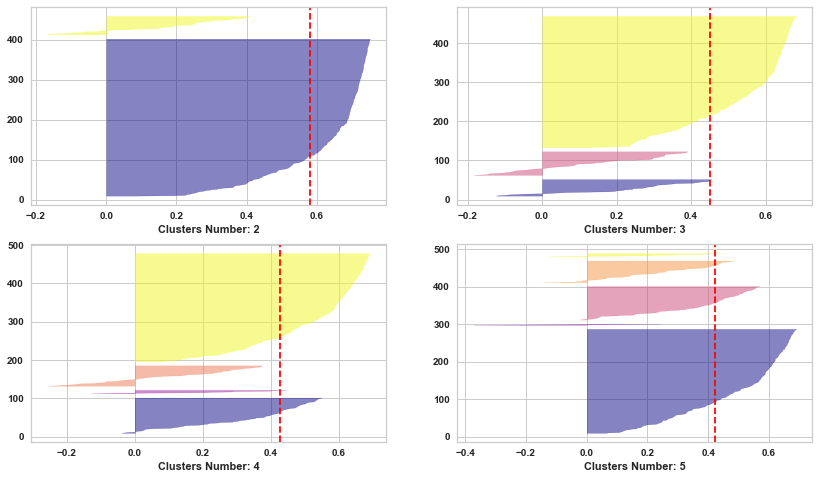

In [83]:
# Vizualizing the clusters [2,3,4,5] and the Silhouette score by use of SilhouetteVisualizer from yellobrick.cluster
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(14,8))
silhouettescore=[]
for i in [2,3,4,5]:
    plt.rcParams['font.size']=12
    plt.rcParams['font.weight']='bold'
    k_means=KMeans(n_clusters=i, init='k-means++', random_state=0)
    x, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(k_means, colors='plasma', ax=ax[x-1][mod])
    ax[x-1][mod].set_xlabel('Clusters Number: {}'.format(i),fontweight='bold')
    
    visualizer.fit(X_pca)
    
    silhouettescore.append(visualizer.silhouette_score_ )
    
# By taking into consideration the 'Elbow' approach, the 'Silhouette' score &  the vizualizer, the use of 3 clusters seems
# to be the optimal solution as a) it has lower WCSS decrease rate ( Cluster 3 to CLuster 4) compared to the WCSS decrease
# rates from Cluster 1 to CLuster 2 and from CLuster 2 to Cluster 3 respectively, b) it has a relatively good Silhouette score
# compared to the scores of the other clusters and c) despite the fact that one of its classes has score below average,
# the widths the two smallest groups in size are similar (compared to Cluster 4 and Cluster 5 plots where there is presence
# of classes with significantly small widths)
# Ideally, the widths of each class of a cluster should be similar but this is not the case for any of the examined cases
# Cluster 2 score is high but the first class score of this cluster is signicantly below the average score
# Cluster 4 could be another choice, despite the fact that one score of its classes is less than the average score and
# two of its classes have very small widths
# Cluster 5 has also the disadvantage of not having classes with similar widths
# In this case study, for demonstration purposes, examples of the Kmeans clustering algorithm are to be presented with the use
# of 2,3 & 4 clusters.
# It needs to be mentioned though, that the selection of number of clusters is up to the user as it depends on
# many factors such as the requirements of the case study/project/scenario.

In [84]:
# Same score as with the sklearn.metrics silhouette_score
i=1
for x in silhouettescore:
    i=1+i
    print('Cluster {} Score: {} '.format(i,x))

Cluster 2 Score: 0.5790805137581542 
Cluster 3 Score: 0.45157594153331243 
Cluster 4 Score: 0.4264733479080678 
Cluster 5 Score: 0.4220569753757605 


In [85]:
# Fitting KMeans algorithm to the dataset for Clusters number = 2
kmeans2clust = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_2clusters = kmeans2clust.fit_predict(X_pca)

df_4comp['2_Clusters']=y_2clusters
df_4comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


In [86]:
# The labels assigned to each dataset sample for clusters number equal to 2
kmeans2clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

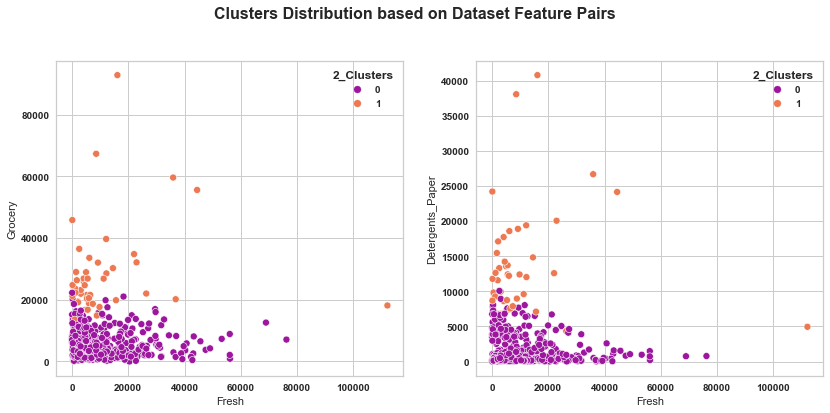

In [87]:
# Example of Clusters Distribution based on Dataset Feature Pairs (Clusters number = 2)
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_4comp, x='Fresh', y='Grocery', hue='2_Clusters',palette='plasma',ax=axs[0])
sns.scatterplot(data=df_4comp, x='Fresh', y='Detergents_Paper', hue='2_Clusters',palette='plasma',ax=axs[1])


for ax in axs.flat:
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=16)
    ax.figure.tight_layout(pad=2)
    plt.show()

In [88]:
# Fitting KMeans algorithm to the dataset for Clusters number = 3
kmeans3clust = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_3clusters = kmeans3clust.fit_predict(X_pca)

df_4comp['3_Clusters']=y_3clusters
df_4comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters,3_Clusters
0,12669,9656,7561,214,2674,1338,0,2
1,7057,9810,9568,1762,3293,1776,0,2
2,6353,8808,7684,2405,3516,7844,0,2
3,13265,1196,4221,6404,507,1788,0,2
4,22615,5410,7198,3915,1777,5185,0,1


In [89]:
# The labels assigned to each dataset sample for clusters number equal to 3
kmeans3clust.labels_

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

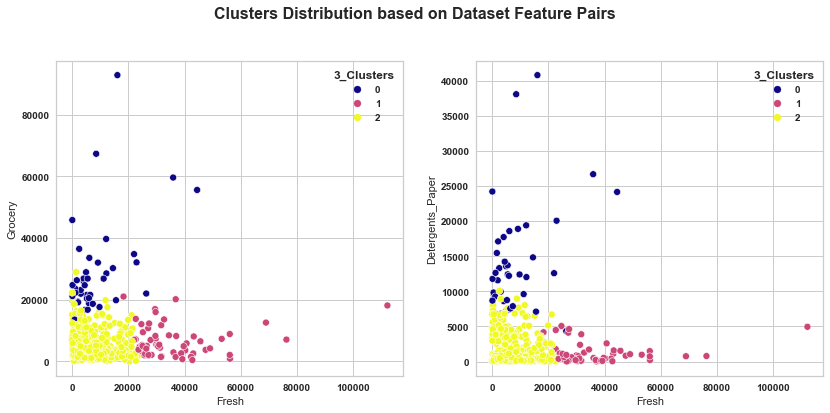

In [90]:
# Example of Clusters Distribution based on Dataset Feature Pairs (Clusters number = 3)
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_4comp, x='Fresh', y='Grocery', hue='3_Clusters',palette='plasma',ax=axs[0])

sns.scatterplot(data=df_4comp, x='Fresh', y='Detergents_Paper', hue='3_Clusters',palette='plasma',ax=axs[1])


for ax in axs.flat:
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=16)
    ax.figure.tight_layout(pad=2)
    plt.show()




In [91]:
# Fitting KMeans algorithm to the dataset for Clusters number = 4
kmeans4clust = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_4clusters = kmeans4clust.fit_predict(X_pca)

df_4comp['4_Clusters']=y_4clusters
df_4comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters,3_Clusters,4_Clusters
0,12669,9656,7561,214,2674,1338,0,2,3
1,7057,9810,9568,1762,3293,1776,0,2,3
2,6353,8808,7684,2405,3516,7844,0,2,3
3,13265,1196,4221,6404,507,1788,0,2,3
4,22615,5410,7198,3915,1777,5185,0,1,2


In [92]:
# The labels assigned to each dataset sample for clusters number equal to 4
kmeans4clust.labels_

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 2, 0, 0, 3, 0, 3, 3, 3, 3, 3,
       2, 0, 0, 3, 3, 3, 0, 2, 3, 3, 3, 2, 3, 0, 2, 0, 0, 2, 2, 3, 0, 0,
       0, 0, 0, 1, 0, 0, 3, 3, 2, 0, 2, 3, 1, 0, 3, 3, 3, 1, 3, 0, 3, 1,
       3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 1, 1, 2,
       3, 2, 3, 3, 1, 2, 0, 3, 3, 3, 3, 3, 0, 0, 3, 2, 3, 3, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       2, 3, 3, 3, 3, 2, 0, 2, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 2, 0,
       3, 3, 0, 0, 2, 3, 3, 0, 3, 3, 3, 0, 3, 1, 3, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

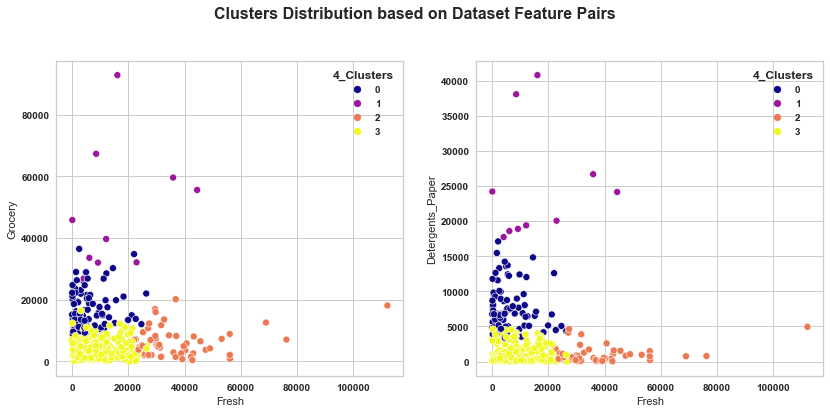

In [93]:
# Example of Clusters Distribution based on Dataset Feature Pairs (Clusters number = 4)
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_4comp, x='Fresh', y='Grocery', hue='4_Clusters',palette='plasma',ax=axs[0])

sns.scatterplot(data=df_4comp, x='Fresh', y='Detergents_Paper', hue='4_Clusters',palette='plasma',ax=axs[1])


for ax in axs.flat:
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=16)
    ax.figure.tight_layout(pad=2)
    plt.show()


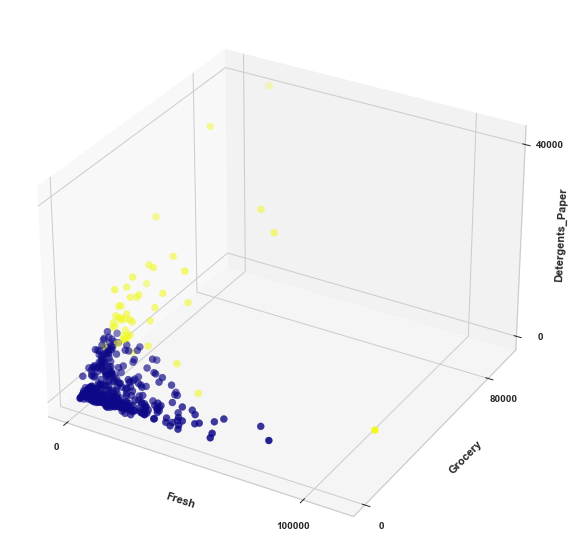

In [94]:
# 3D plot - Clusters Distribution based on 3 Dataset Features (Clusters number = 2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_4comp['Fresh'],df_4comp['Grocery'],df_4comp['Detergents_Paper'],c=kmeans2clust.labels_,cmap='plasma',s=50)
ax.set_xlabel('Fresh',fontweight='bold')
ax.set_ylabel('Grocery',fontweight='bold')
ax.set_zlabel('Detergents_Paper',fontweight='bold')
ax.set_xticks([0,100000])
ax.set_yticks([0,80000])
ax.set_zticks([0,40000])
plt.show()

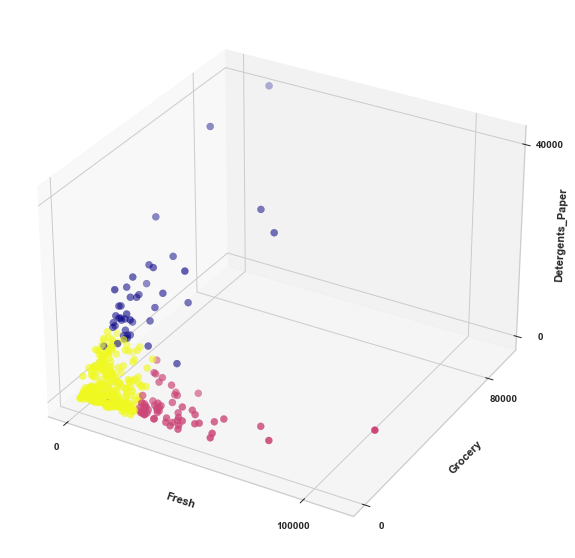

In [95]:
# 3D plot - Clusters Distribution based on 3 Dataset Features (Clusters number = 3)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_4comp['Fresh'],df_4comp['Grocery'],df_4comp['Detergents_Paper'],c=kmeans3clust.labels_,cmap='plasma',s=50)
ax.set_xlabel('Fresh',fontweight='bold')
ax.set_ylabel('Grocery',fontweight='bold')
ax.set_zlabel('Detergents_Paper',fontweight='bold')
ax.set_xticks([0,100000])
ax.set_yticks([0,80000])
ax.set_zticks([0,40000])
plt.show()


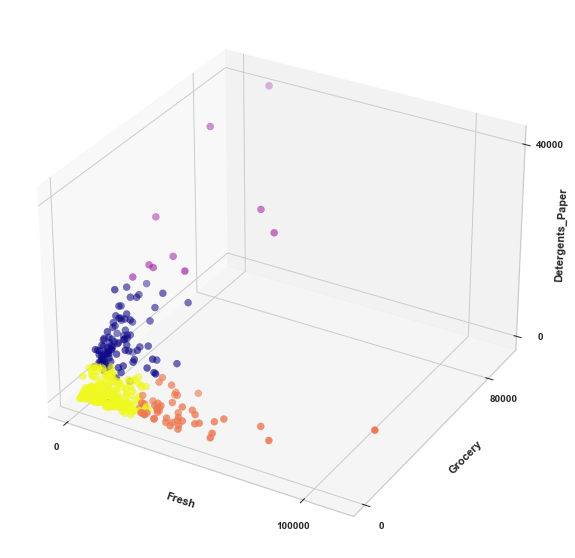

In [96]:
# 3D plot - Clusters Distribution based on 3 Dataset Features (Clusters number = 4)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_4comp['Fresh'],df_4comp['Grocery'],df_4comp['Detergents_Paper'],c=kmeans4clust.labels_,cmap='plasma',s=50)
ax.set_xlabel('Fresh',fontweight='bold')
ax.set_ylabel('Grocery',fontweight='bold')
ax.set_zlabel('Detergents_Paper',fontweight='bold')
ax.set_xticks([0,100000])
ax.set_yticks([0,80000])
ax.set_zticks([0,40000])
plt.show()

### New Inputs for KMeans Cluster Prediction

In [97]:
# New Inputs
new_inputs=[[39000,1400,800,4500,100,2400],
           [14700,15500,30200,400,15000,1800],
           [10300,2000,2200,1000,175,2100],
           [10000,4000,3000,400,1000,2500]]

#Rescaling the new inputs
sc_new_inputs=scaler.transform(new_inputs)
# Rescaling new inputs are transformed (PCA)
X_new=xpca.transform(sc_new_inputs)


In [98]:
# New input shape after PCA
X_new.shape

(4, 4)

In [99]:
# New Inputs Cluster prediction (Number of Clusters =2 )
class_2_pred=kmeans2clust.predict(X_new)

i=0
for x in class_2_pred:
    i+=1
    print (' Case 2 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Case 2 Clusters: The predicted class for new input_1 is: 0
 Case 2 Clusters: The predicted class for new input_2 is: 1
 Case 2 Clusters: The predicted class for new input_3 is: 0
 Case 2 Clusters: The predicted class for new input_4 is: 0


In [100]:
# New Inputs Cluster prediction (Number of Clusters =3 )
class_3_pred=kmeans3clust.predict(X_new)

i=0
for x in class_3_pred:
    i+=1
    print (' Case 3 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Case 3 Clusters: The predicted class for new input_1 is: 1
 Case 3 Clusters: The predicted class for new input_2 is: 0
 Case 3 Clusters: The predicted class for new input_3 is: 2
 Case 3 Clusters: The predicted class for new input_4 is: 2


In [101]:
# New Inputs Cluster prediction (Number of Clusters =4 )
class_4_pred=kmeans4clust.predict(X_new)

i=0
for x in class_4_pred:
    i+=1
    print (' Case 4 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Case 4 Clusters: The predicted class for new input_1 is: 2
 Case 4 Clusters: The predicted class for new input_2 is: 0
 Case 4 Clusters: The predicted class for new input_3 is: 3
 Case 4 Clusters: The predicted class for new input_4 is: 3


## b) Hierarchical Clustering

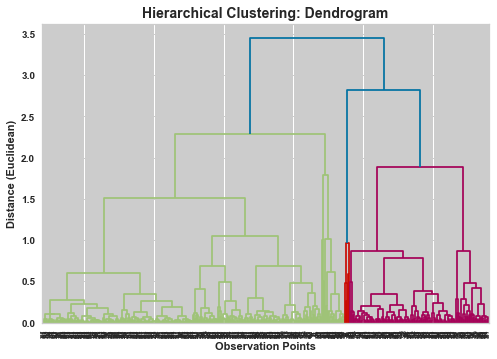

In [102]:
# Using the dendrogram to find the optimal number of clusters
# The optimal number of clusters has be determined by setting a dissimilarity threshold(horizontal line -along x-axis) that
# aims to select the clusters with Euclidean distance < dissimilarity threshold. The number of Clusters is equal to the 
# number of vertical lines(along-y-axis) that cross the horizontal line of dissimilarity threshold. For example, by setting
# the dissimilarity threshold at Euclidean distance (PCA transformed) value of 3, there are two vertical lines that
#  cross this threshold (the two vertical blue lines), therefore the number of clusters is equal to 2.
# If we wanted the dissimilarity threshold to be lower i.e 2.5, then  there would be 3 vertical lines that cross this
# threshold (three blue), thus the number of clusters would be equal to 3
# If we wanted the dissimilarity threshold to be i.e 2, then  there would be 4 vertical lines that cross this
# threshold (two green and two blue), thus the number of clusters would be equal to 4
# In this case study, the Hierarchical Clustering model is to be demonstrated with 2 ,3 and 4 clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))

plt.title('Hierarchical Clustering: Dendrogram',fontweight='bold',fontsize=14)
plt.xlabel('Observation Points',fontweight='bold')
plt.ylabel('Distance (Euclidean)',fontweight='bold')
plt.show()



In [103]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
h_cluster2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
h_pred2 = h_cluster2.fit_predict(X_pca)
df_4comp['Hierchical_2']=h_pred2
df_4comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters,3_Clusters,4_Clusters,Hierchical_2
0,12669,9656,7561,214,2674,1338,0,2,3,1
1,7057,9810,9568,1762,3293,1776,0,2,3,0
2,6353,8808,7684,2405,3516,7844,0,2,3,0
3,13265,1196,4221,6404,507,1788,0,2,3,1
4,22615,5410,7198,3915,1777,5185,0,1,2,1


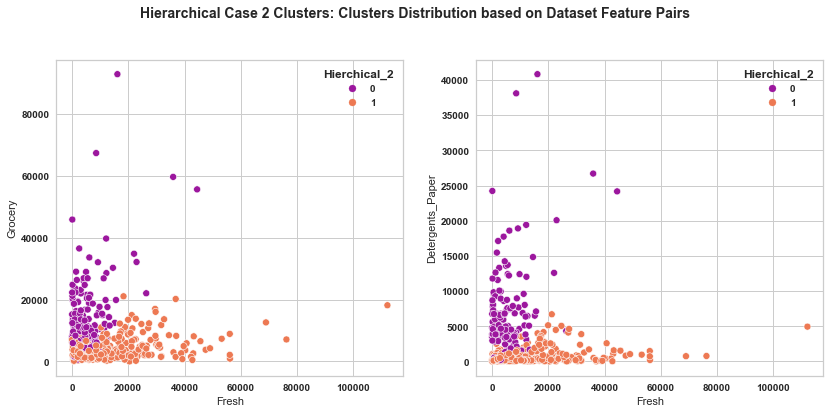

In [104]:
# Dataset Features Scatter Plot - Hierarchical Clustering: 2 Clusters
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_4comp, x='Fresh', y='Grocery', hue='Hierchical_2',palette='plasma',ax=axs[0])
sns.scatterplot(data=df_4comp, x='Fresh', y='Detergents_Paper', hue='Hierchical_2',palette='plasma',ax=axs[1])




for ax in axs.flat:
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Hierarchical Case 2 Clusters: Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=14)
    ax.figure.tight_layout(pad=2)
    plt.show()

In [105]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
h_cluster3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
h_pred3 = h_cluster3.fit_predict(X_pca)
df_4comp['Hierchical_3']=h_pred3
df_4comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters,3_Clusters,4_Clusters,Hierchical_2,Hierchical_3
0,12669,9656,7561,214,2674,1338,0,2,3,1,0
1,7057,9810,9568,1762,3293,1776,0,2,3,0,1
2,6353,8808,7684,2405,3516,7844,0,2,3,0,1
3,13265,1196,4221,6404,507,1788,0,2,3,1,0
4,22615,5410,7198,3915,1777,5185,0,1,2,1,0


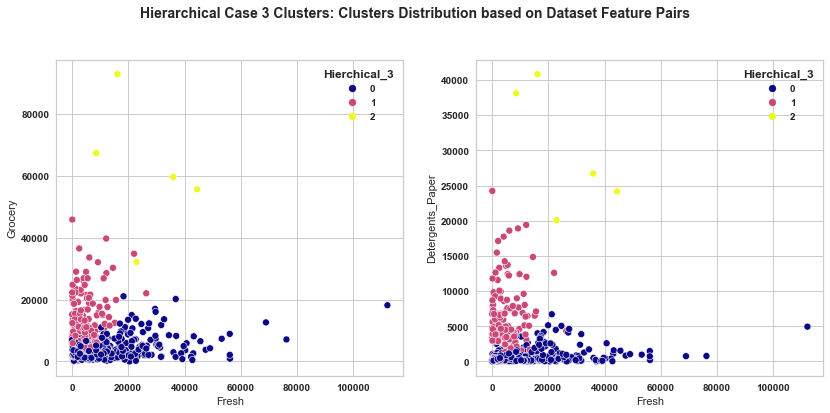

In [106]:
# Dataset Features Scatter Plot - Hierarchical Clustering: 3 Clusters
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_4comp, x='Fresh', y='Grocery', hue='Hierchical_3',palette='plasma',ax=axs[0])
sns.scatterplot(data=df_4comp, x='Fresh', y='Detergents_Paper', hue='Hierchical_3',palette='plasma',ax=axs[1])




for ax in axs.flat:
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Hierarchical Case 3 Clusters: Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=14)
    ax.figure.tight_layout(pad=2)
    plt.show()

In [107]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
h_cluster4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
h_pred4 = h_cluster4.fit_predict(X_pca)
df_4comp['Hierchical_4']=h_pred4
df_4comp.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,2_Clusters,3_Clusters,4_Clusters,Hierchical_2,Hierchical_3,Hierchical_4
0,12669,9656,7561,214,2674,1338,0,2,3,1,0,3
1,7057,9810,9568,1762,3293,1776,0,2,3,0,1,0
2,6353,8808,7684,2405,3516,7844,0,2,3,0,1,0
3,13265,1196,4221,6404,507,1788,0,2,3,1,0,3
4,22615,5410,7198,3915,1777,5185,0,1,2,1,0,3


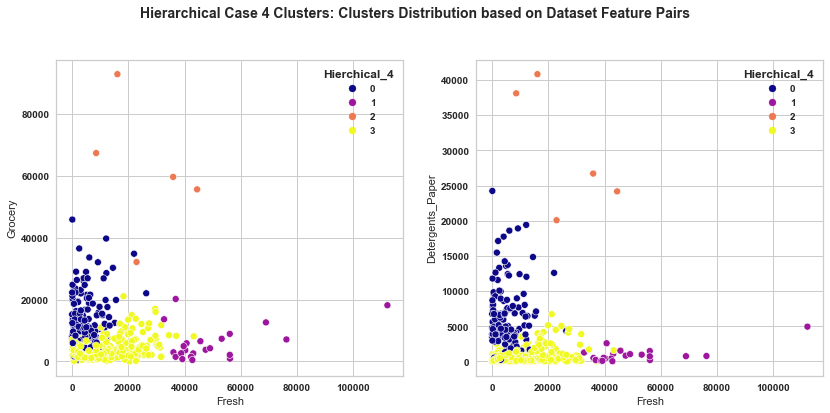

In [108]:
# Dataset Features Scatter Plot - Hierarchical Clustering: 4 Clusters
fig,axs=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df_4comp, x='Fresh', y='Grocery', hue='Hierchical_4',palette='plasma',ax=axs[0])
sns.scatterplot(data=df_4comp, x='Fresh', y='Detergents_Paper', hue='Hierchical_4',palette='plasma',ax=axs[1])




for ax in axs.flat:
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams['font.size']=12
    fig.suptitle("Hierarchical Case 4 Clusters: Clusters Distribution based on Dataset Feature Pairs", fontweight='bold',fontsize=14)
    ax.figure.tight_layout(pad=2)
    plt.show()

### New Inputs for Hierarchical Cluster Prediction

In [109]:
# New Inputs for Hierarchical Cluster prediction (Case 2 Clusters)
hierarchical_pred2=h_cluster2.fit_predict(X_new)

i=0
for x in hierarchical_pred2:
    i+=1
    print (' Hierarchical 2 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Hierarchical 2 Clusters: The predicted class for new input_1 is: 0
 Hierarchical 2 Clusters: The predicted class for new input_2 is: 1
 Hierarchical 2 Clusters: The predicted class for new input_3 is: 0
 Hierarchical 2 Clusters: The predicted class for new input_4 is: 0


In [110]:
# New Inputs for Hierarchical Cluster prediction (Case 3 Clusters)
hierarchical_pred3=h_cluster3.fit_predict(X_new)

i=0
for x in hierarchical_pred3:
    i+=1
    print (' Hierarchical 3 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Hierarchical 3 Clusters: The predicted class for new input_1 is: 2
 Hierarchical 3 Clusters: The predicted class for new input_2 is: 1
 Hierarchical 3 Clusters: The predicted class for new input_3 is: 0
 Hierarchical 3 Clusters: The predicted class for new input_4 is: 0


In [111]:
# New Inputs for Hierarchical Cluster prediction (Case 4 Clusters)
hierarchical_pred4=h_cluster4.fit_predict(X_new)

i=0
for x in hierarchical_pred4:
    i+=1
    print (' Hierarchical 4 Clusters: The predicted class for new input_{} is: {}'.format(i,x))

 Hierarchical 4 Clusters: The predicted class for new input_1 is: 2
 Hierarchical 4 Clusters: The predicted class for new input_2 is: 3
 Hierarchical 4 Clusters: The predicted class for new input_3 is: 1
 Hierarchical 4 Clusters: The predicted class for new input_4 is: 0
